Истинные параметры: w=3.00, b=1.00
Mini-batch SGD (size=10):
  Финальные веса: w = 2.9173, b = 1.2589
  Финальная ошибка (MSE): 0.8350
Обычный SGD (size=1):
  Финальные веса: w = 2.9633, b = 1.2216
  Финальная ошибка (MSE): 0.8098


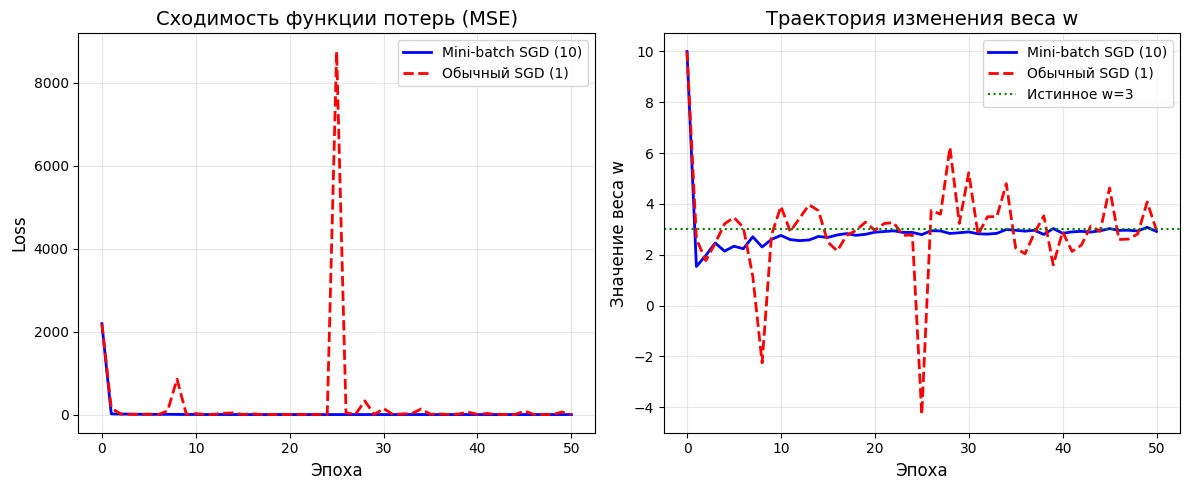

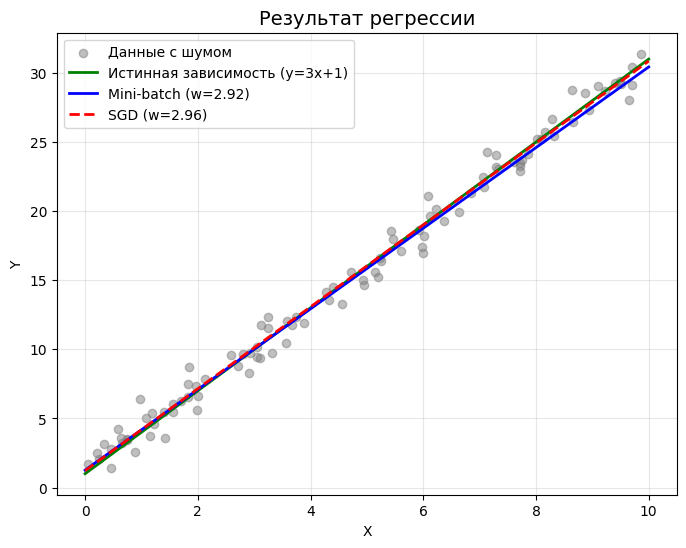

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

class LinearRegressionSGD:
    def __init__(self, w_init=10.0, b_init=10.0, lr=0.02):
        self.w = w_init
        self.b = b_init
        self.lr = lr
        self.loss_history = []
        self.w_history = []
        self.b_history = []

    def predict(self, X):
        return self.w * X + self.b

    def compute_loss(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y_pred - y) ** 2)

    def train_step(self, X_batch, y_batch):
        batch_size = len(X_batch)
        y_pred = self.predict(X_batch)

        error = y_pred - y_batch
        
        grad_w = (2 / batch_size) * np.sum(error * X_batch)
        grad_b = (2 / batch_size) * np.sum(error)

        self.w -= self.lr * grad_w
        self.b -= self.lr * grad_b

    def fit(self, X, y, epochs=100, batch_size=10):
        n_samples = len(X)
        self.loss_history = []
        self.w_history = []
        self.b_history = []

        self.w_history.append(self.w)
        self.b_history.append(self.b)
        self.loss_history.append(self.compute_loss(X, y))

        for epoch in range(epochs):

            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                self.train_step(X_batch, y_batch)

            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)
            self.w_history.append(self.w)
            self.b_history.append(self.b)
            
        return self

def generate_data(n_points=100):
    X = np.random.rand(n_points, 1) * 10

    noise = np.random.normal(0, 1.0, size=X.shape)
    y = 3 * X + 1 + noise
    return X, y

X, y = generate_data(100)

model_mini = LinearRegressionSGD(w_init=10.0, b_init=10.0, lr=0.02)
model_mini.fit(X, y, epochs=50, batch_size=10)

model_sgd = LinearRegressionSGD(w_init=10.0, b_init=10.0, lr=0.02)
model_sgd.fit(X, y, epochs=50, batch_size=1)

print("Истинные параметры: w=3.00, b=1.00")

print(f"Mini-batch SGD (size=10):")
print(f"  Финальные веса: w = {model_mini.w:.4f}, b = {model_mini.b:.4f}")
print(f"  Финальная ошибка (MSE): {model_mini.loss_history[-1]:.4f}")

print(f"Обычный SGD (size=1):")
print(f"  Финальные веса: w = {model_sgd.w:.4f}, b = {model_sgd.b:.4f}")
print(f"  Финальная ошибка (MSE): {model_sgd.loss_history[-1]:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
epochs_range = range(len(model_mini.loss_history))
plt.plot(epochs_range, model_mini.loss_history, label='Mini-batch SGD (10)', linewidth=2, color='blue')
plt.plot(epochs_range, model_sgd.loss_history, label='Обычный SGD (1)', linewidth=2, color='red', linestyle='--')
plt.title('Сходимость функции потерь (MSE)', fontsize=14)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model_mini.w_history, label='Mini-batch SGD (10)', linewidth=2, color='blue')
plt.plot(epochs_range, model_sgd.w_history, label='Обычный SGD (1)', linewidth=2, color='red', linestyle='--')
plt.axhline(3, color='green', linestyle=':', label='Истинное w=3')
plt.title('Траектория изменения веса w', fontsize=14)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Значение веса w', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Данные с шумом', color='gray')
x_line = np.linspace(0, 10, 100).reshape(-1, 1)
plt.plot(x_line, 3*x_line + 1, 'g-', label='Истинная зависимость (y=3x+1)', linewidth=2)
plt.plot(x_line, model_mini.predict(x_line), 'b-', label=f'Mini-batch (w={model_mini.w:.2f})', linewidth=2)
plt.plot(x_line, model_sgd.predict(x_line), 'r--', label=f'SGD (w={model_sgd.w:.2f})', linewidth=2)
plt.title('Результат регрессии', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()